# Task 1 - Fitbit Dataset

#### 1. Read this dataset in pandas , mysql and mongodb 

In [1]:
## read dataset in pandas
import pandas as pd

df1 = pd.read_csv('FitBit data.csv', infer_datetime_format = True)
df1.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


- Read dataset in mongodb


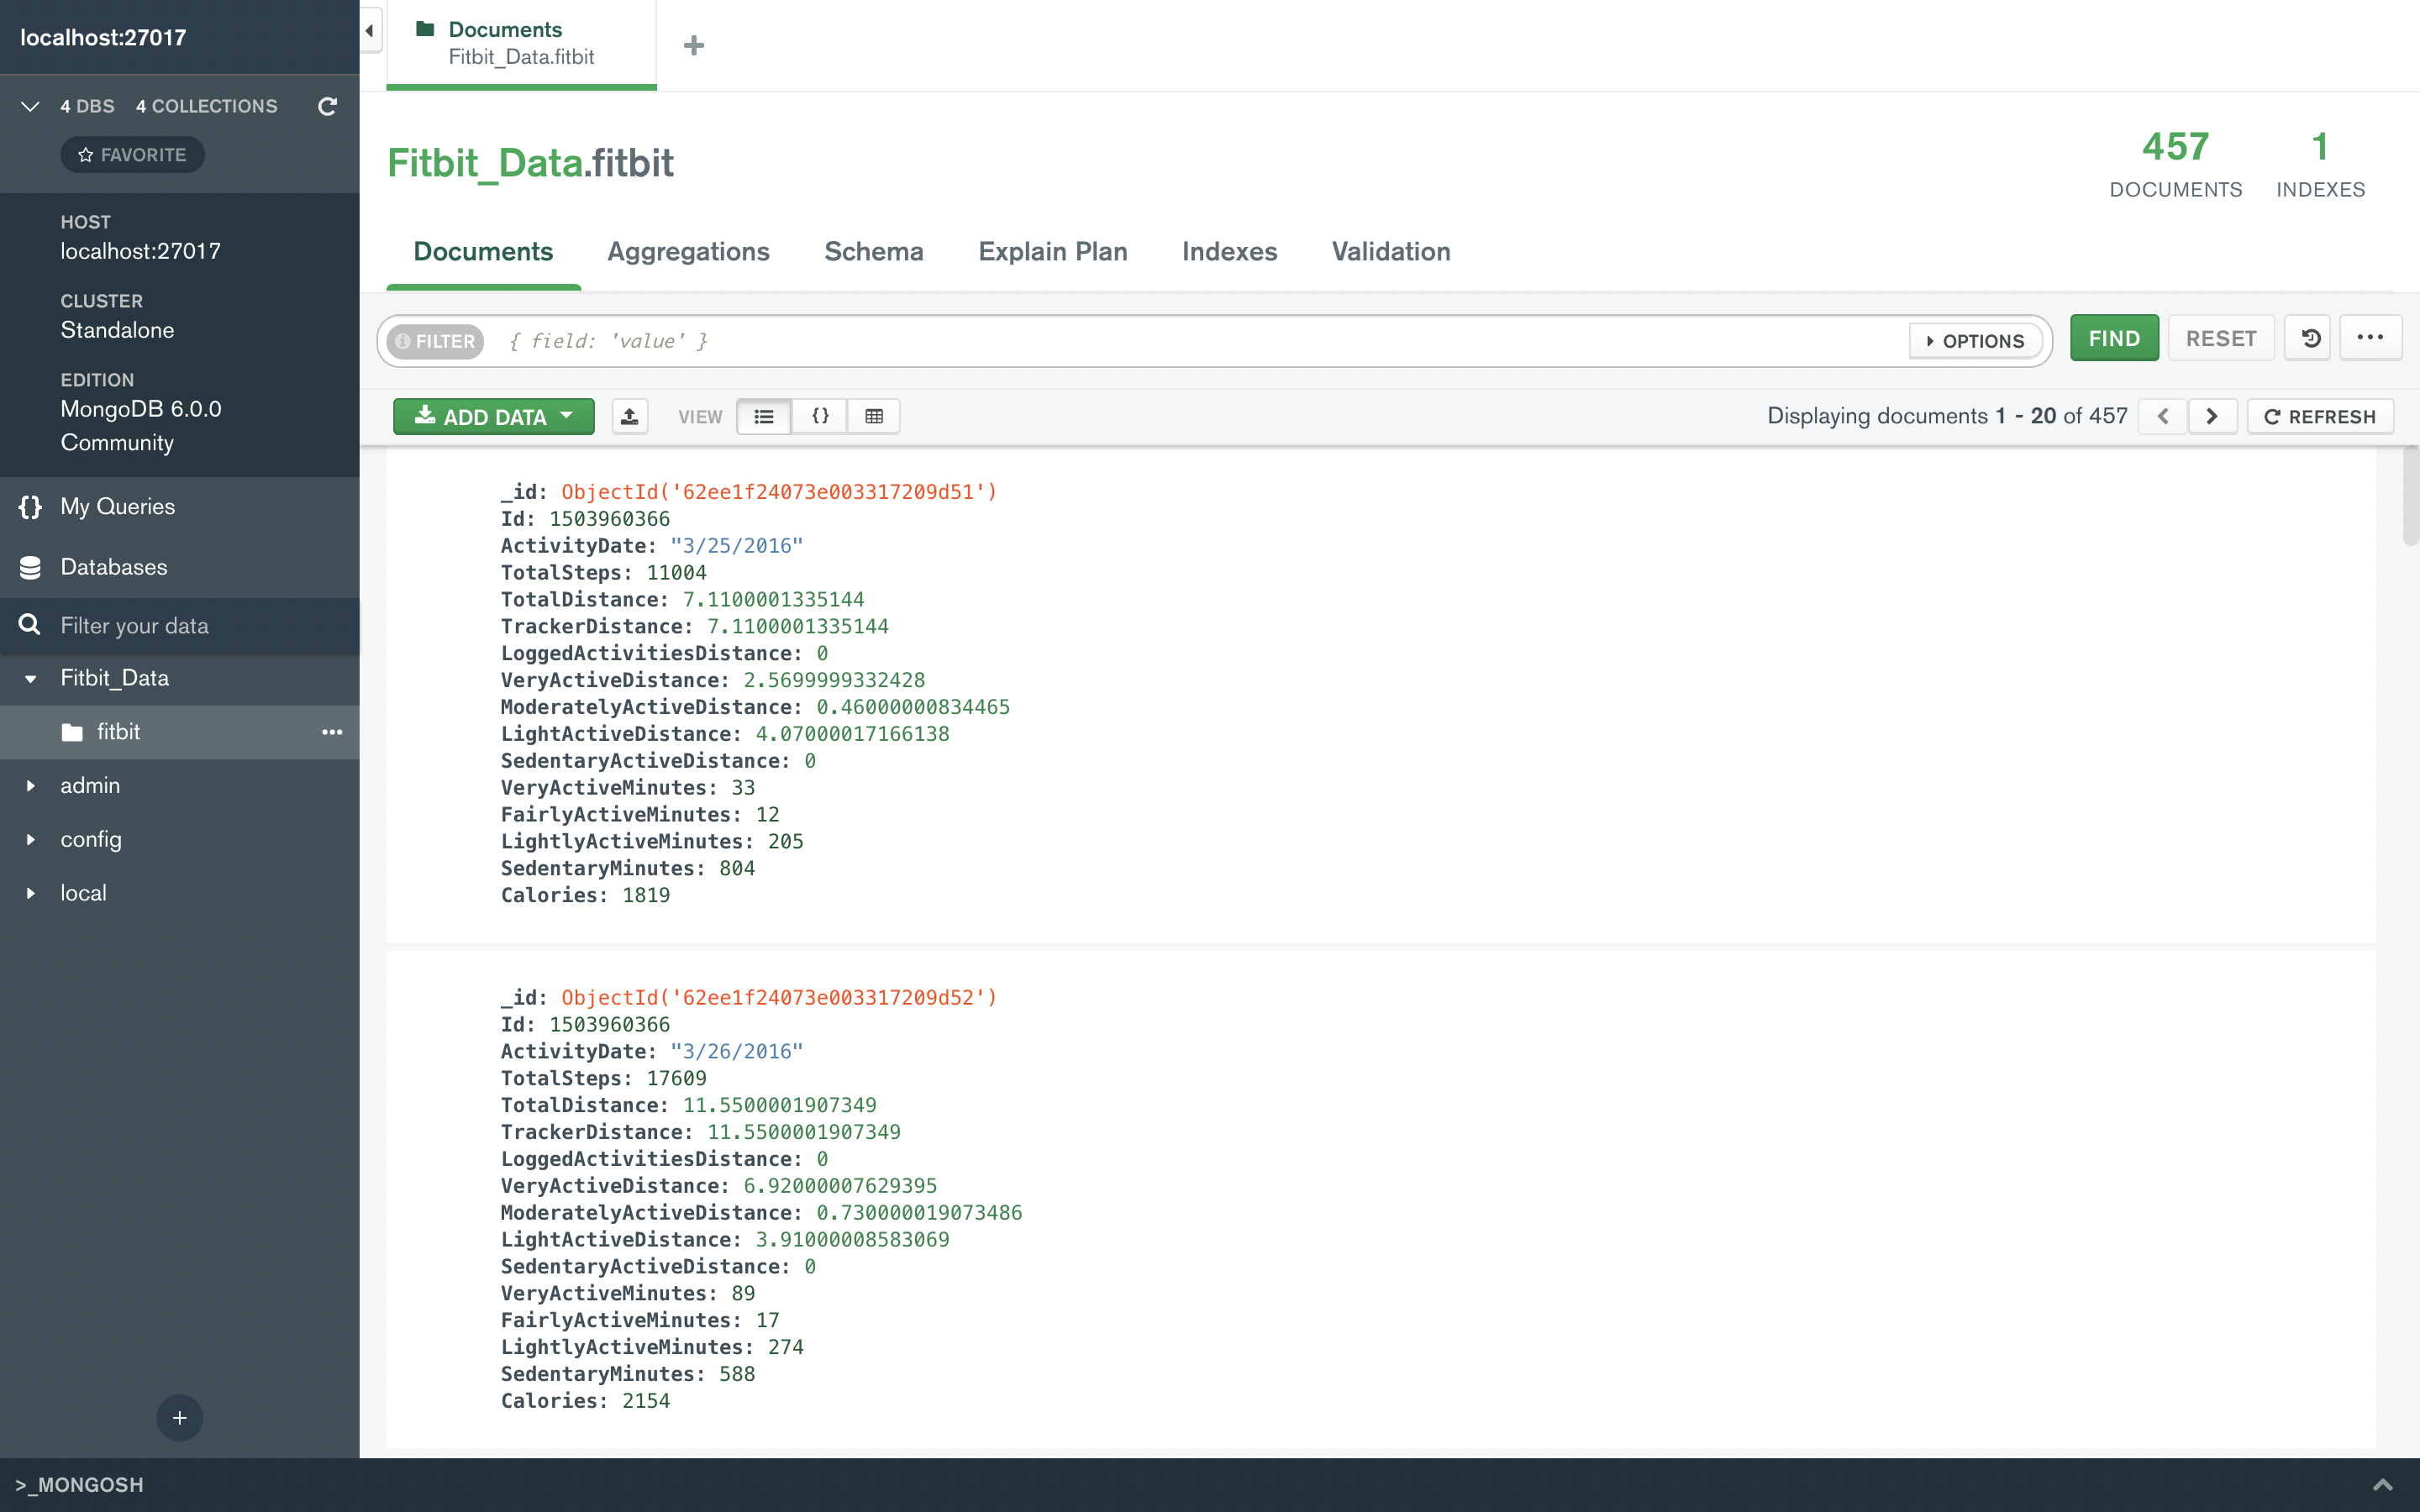

#### 2. While creating a table in mysql don't use manual approach to create it, always use a automation to create a table in mysql

In [19]:
from csv_import import *

## folder name to insert csv files
dataset_dir = 'Datasets'

#required details for database connection
host = 'localhost'
db_name = 'FSDS_dataset'
user = 'root'
passwd = 'mysql123'

#read all '.csv' files from present directory
csv_files = csv_file()

#creating new directory with name mentioned in 'dataset_dir' variable and moving all .csv files inside that folder
new_dir(csv_files, dataset_dir)

#creating dataframe for each file
df = create_dataframe(dataset_dir, csv_files)

for r in csv_files:
    #reading dataframe of the particular file
    dataframe = df[r]
    
    #generating table name 
    table_name = clean_table_name(r)
    
    #generating column name
    column_name, dataframe.columns = clean_column_name(dataframe)
    
    #inserting data 
    insert_into_db(host, db_name, user, passwd, table_name, column_name, file=r,
                  dataframe=dataframe, df_columns=dataframe.columns)

** Opened database successfully **
** fitbit_data table created successfully **


#### 3. Convert all the dates available in dataset to timestamp format in pandas and in sql you have to convert it in date format

In [15]:
date = pd.to_datetime(df1['ActivityDate'])

In [18]:
date

0     2016-03-25
1     2016-03-26
2     2016-03-27
3     2016-03-28
4     2016-03-29
         ...    
452   2016-04-08
453   2016-04-09
454   2016-04-10
455   2016-04-11
456   2016-04-12
Name: ActivityDate, Length: 457, dtype: datetime64[ns]

In [61]:
## in sql convert available dates in date format

import mysql.connector as connection

conn = connection.connect(host='localhost', user='root', passwd='mysql123', database='FSDS_dataset', \
                          use_pure=True, autocommit=True)
cursor = conn.cursor()

# as date is not in 'mm-dd-yyyy' format first convert it to 'yyyy-mm-dd'
q1 = 'SET SQL_SAFE_UPDATES = 0;'
cursor.execute(q1)

q2 = 'UPDATE fitbit_data SET activitydate = str_to_date(activitydate, "%m/%d/%Y");'
cursor.execute(q2)

q3 = 'ALTER TABLE fitbit_data MODIFY activitydate DATE;'
cursor.execute(q3)
print('Datatype changed to DATE')

Datatype changed to DATE


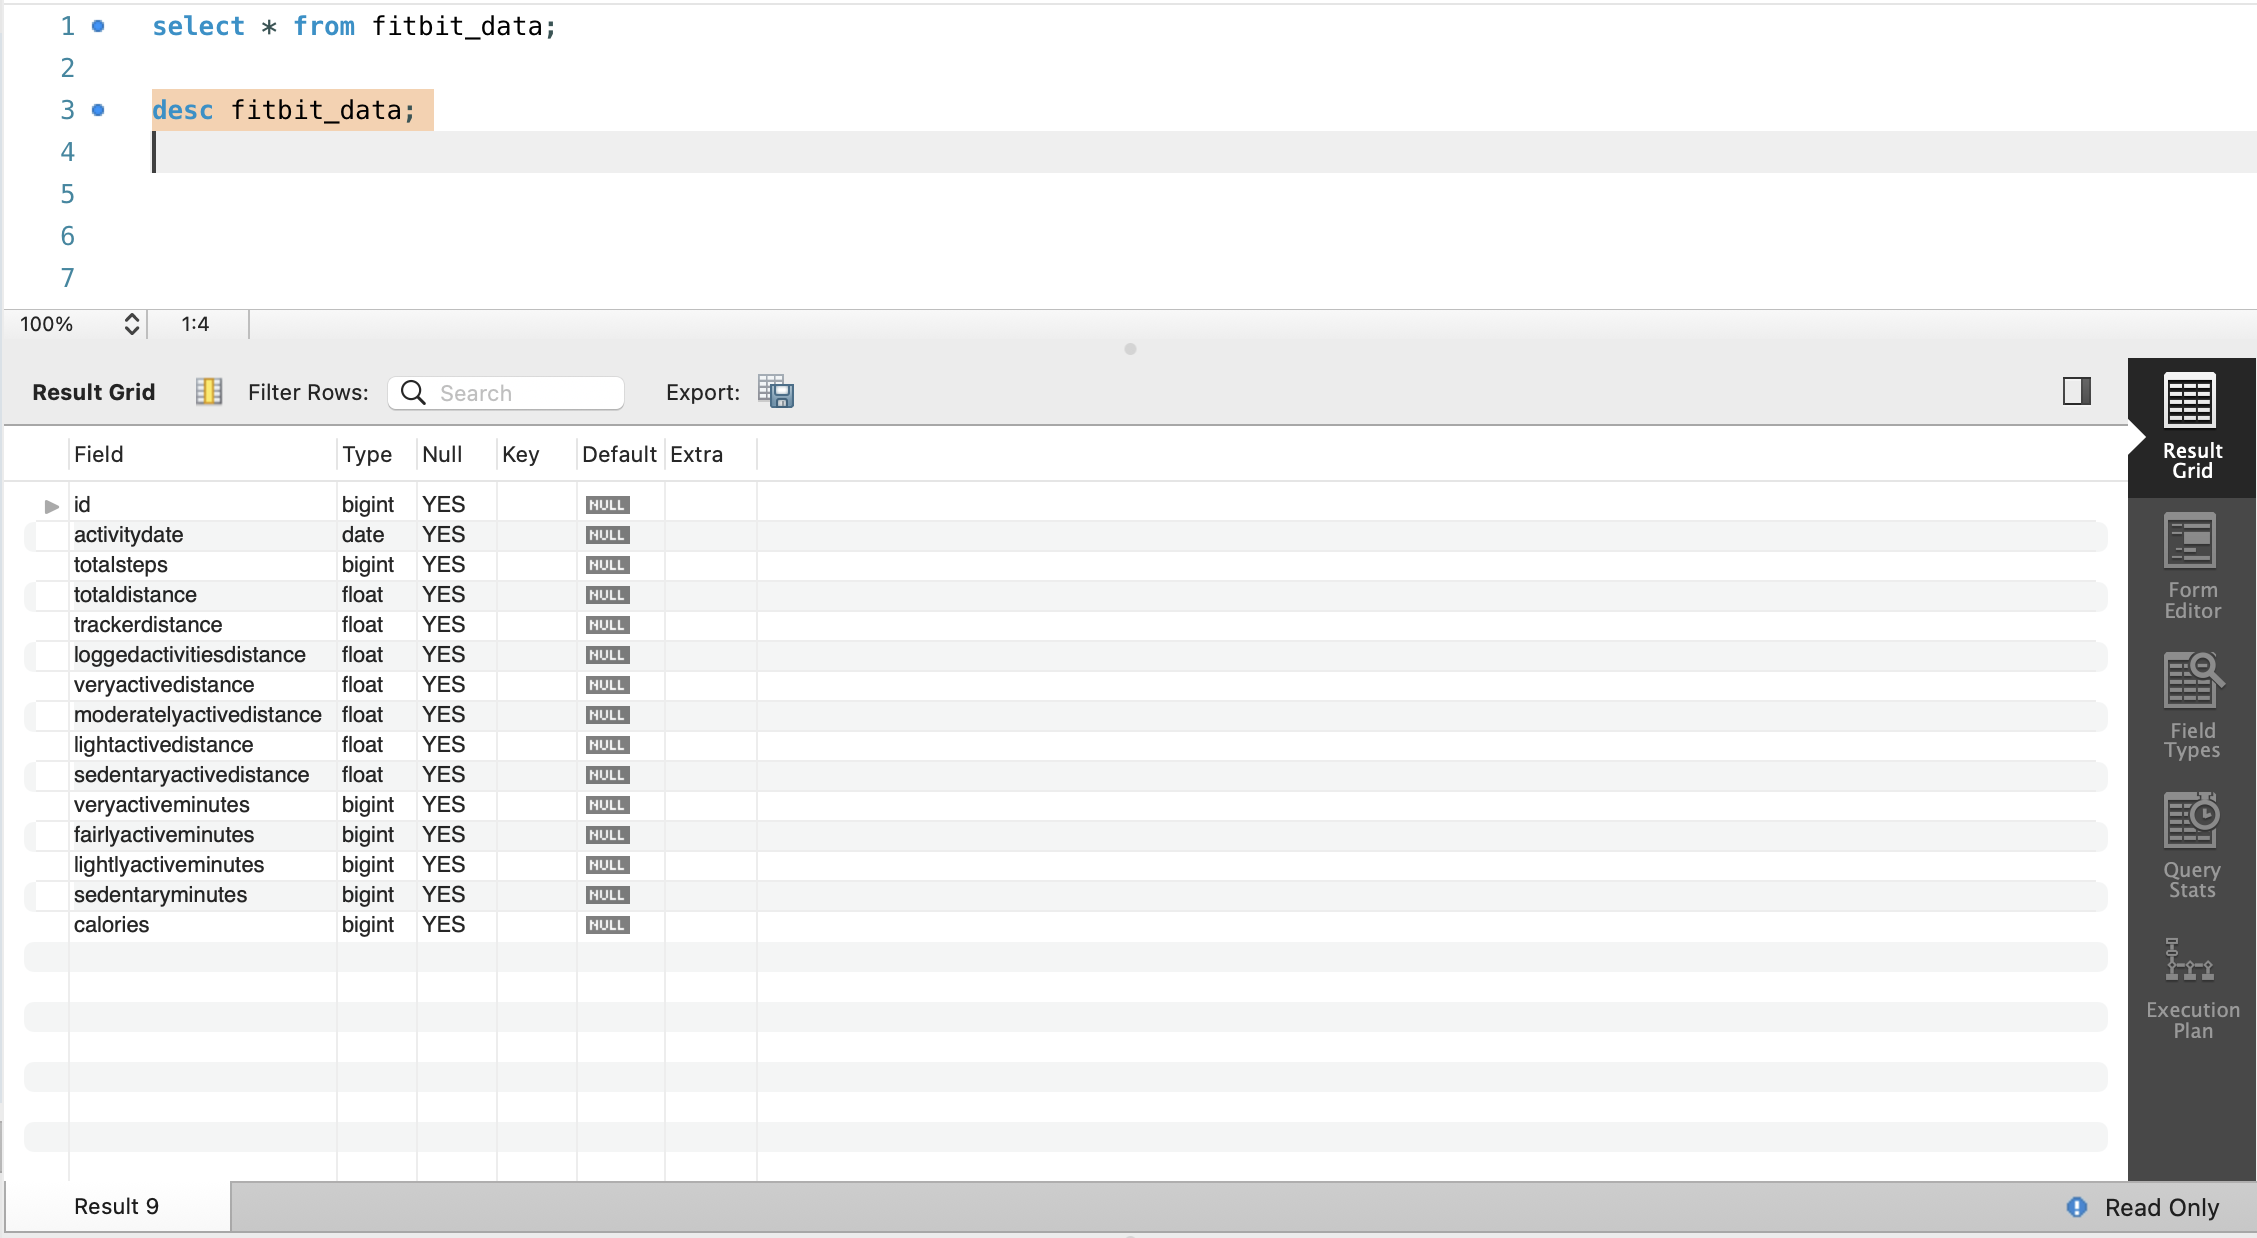

#### 4. Find out in this data that how many unique id's we have

In [63]:
cursor.execute("select count(distinct Id)\
                from fitbit_data")
print("Unique Id's: ",cursor.fetchone())

Unique Id's:  (35,)


#### 5. Which id is one of the active id that you have in whole dataset 


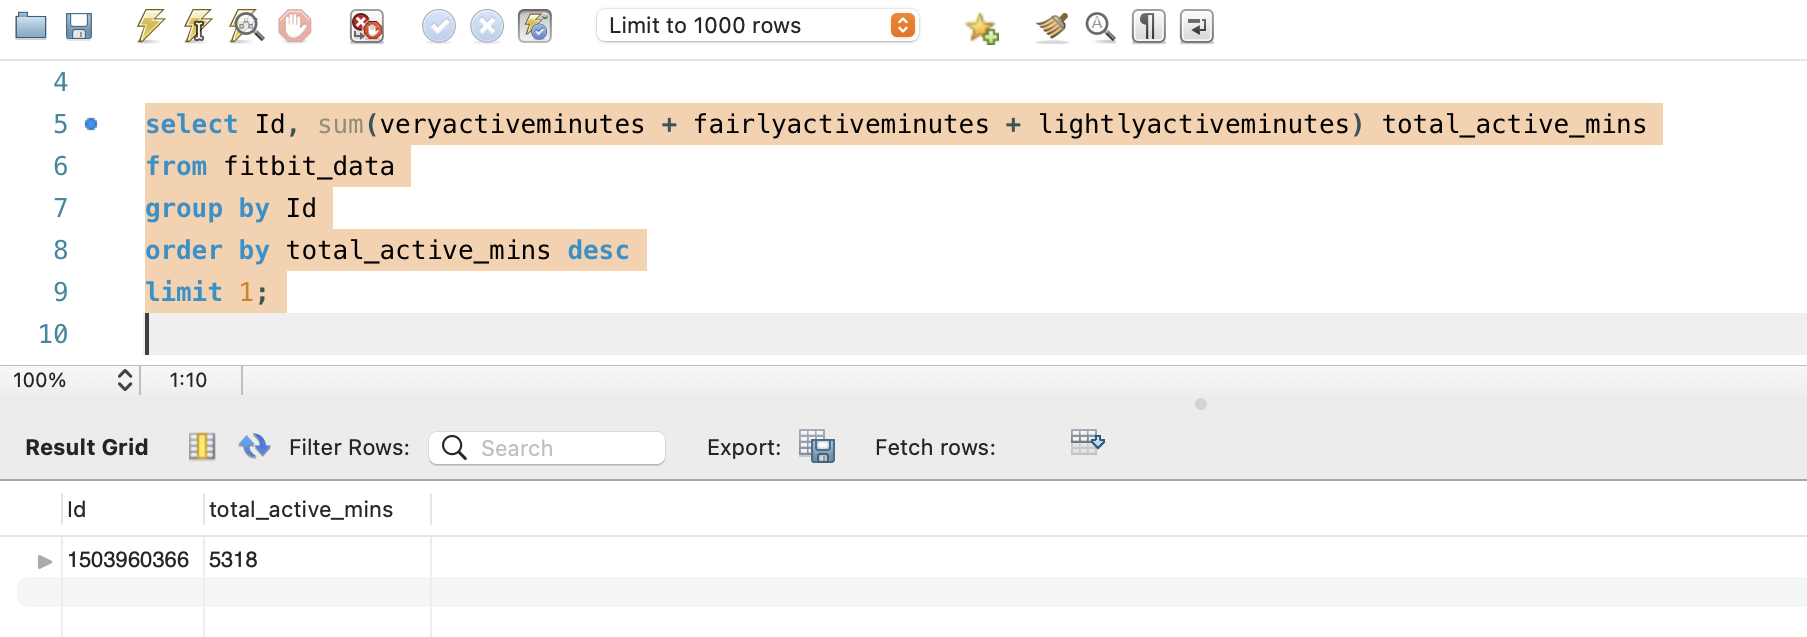


#### 6. How many of them have not logged their activity find out in terms of number of ids 


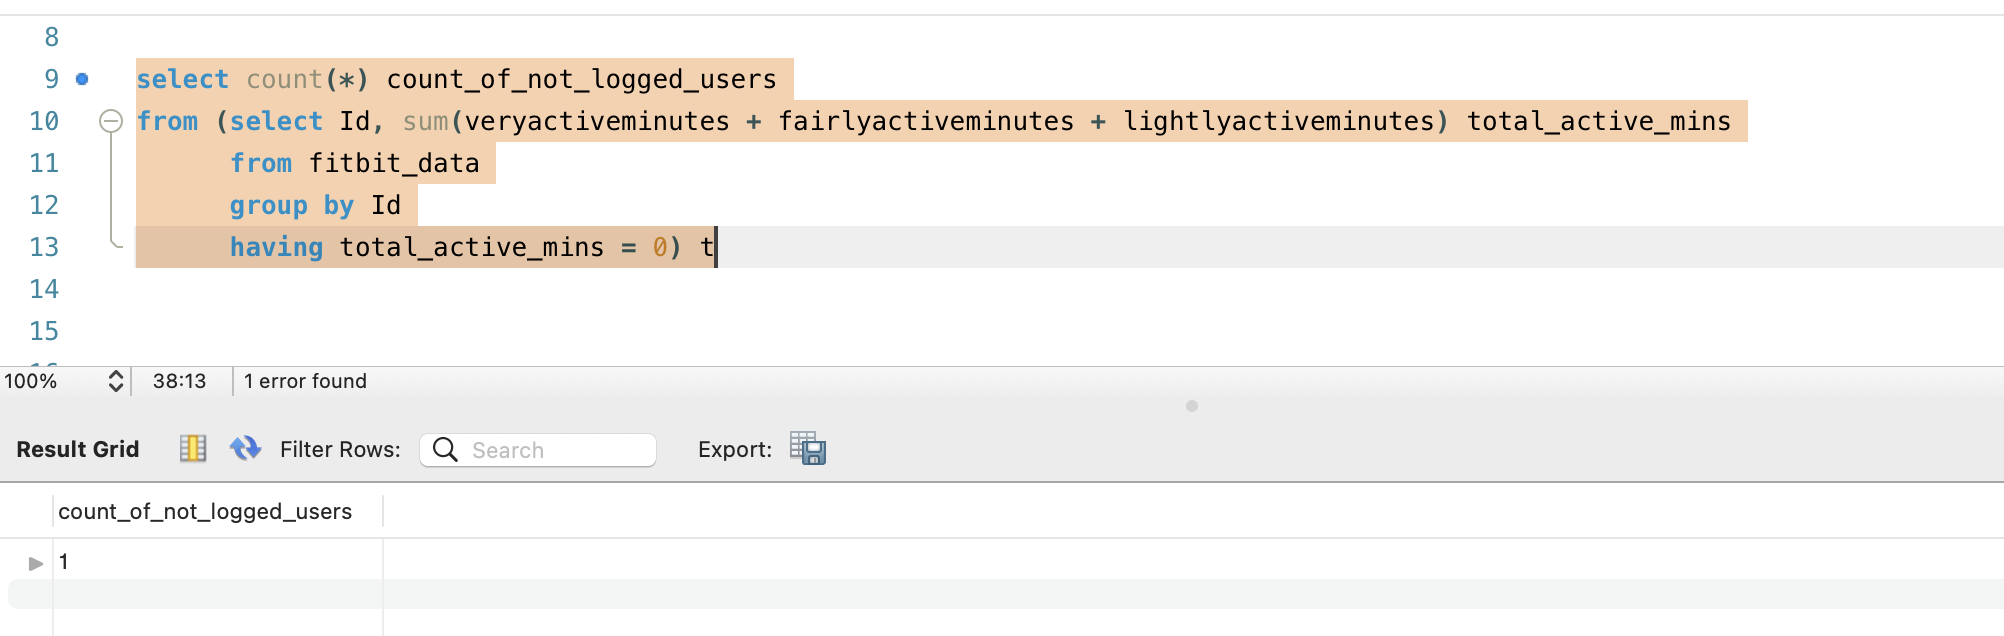


#### 7. Find out who is the laziest person id that we have in dataset 

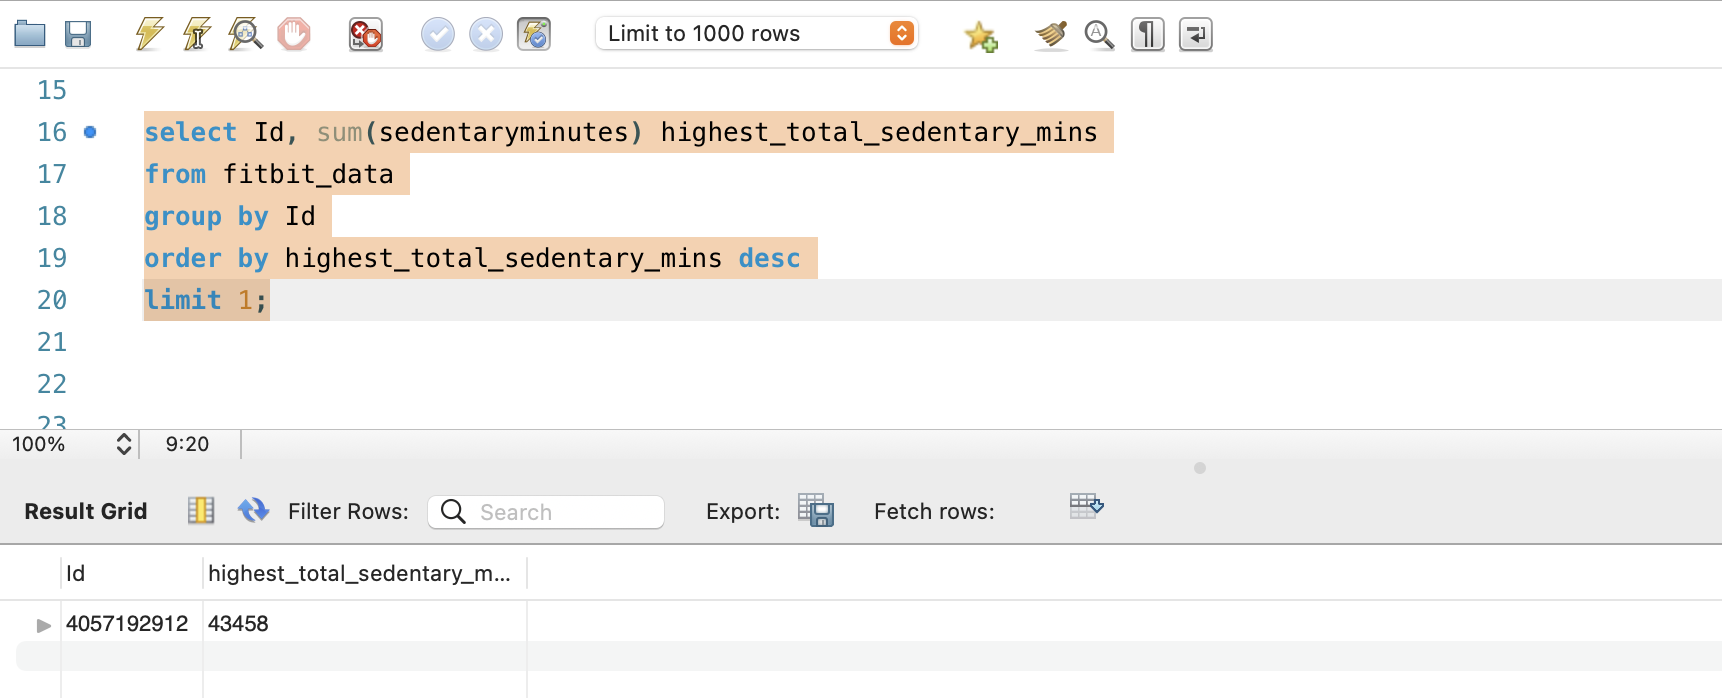

#### 8. Explore over an internet that how much calories burn is required for a healthy person and find out how many healthy person we have in our dataset 

- In this case, if a person burns minimum 2000 calories daily then he/she can be considered as a healthy person.

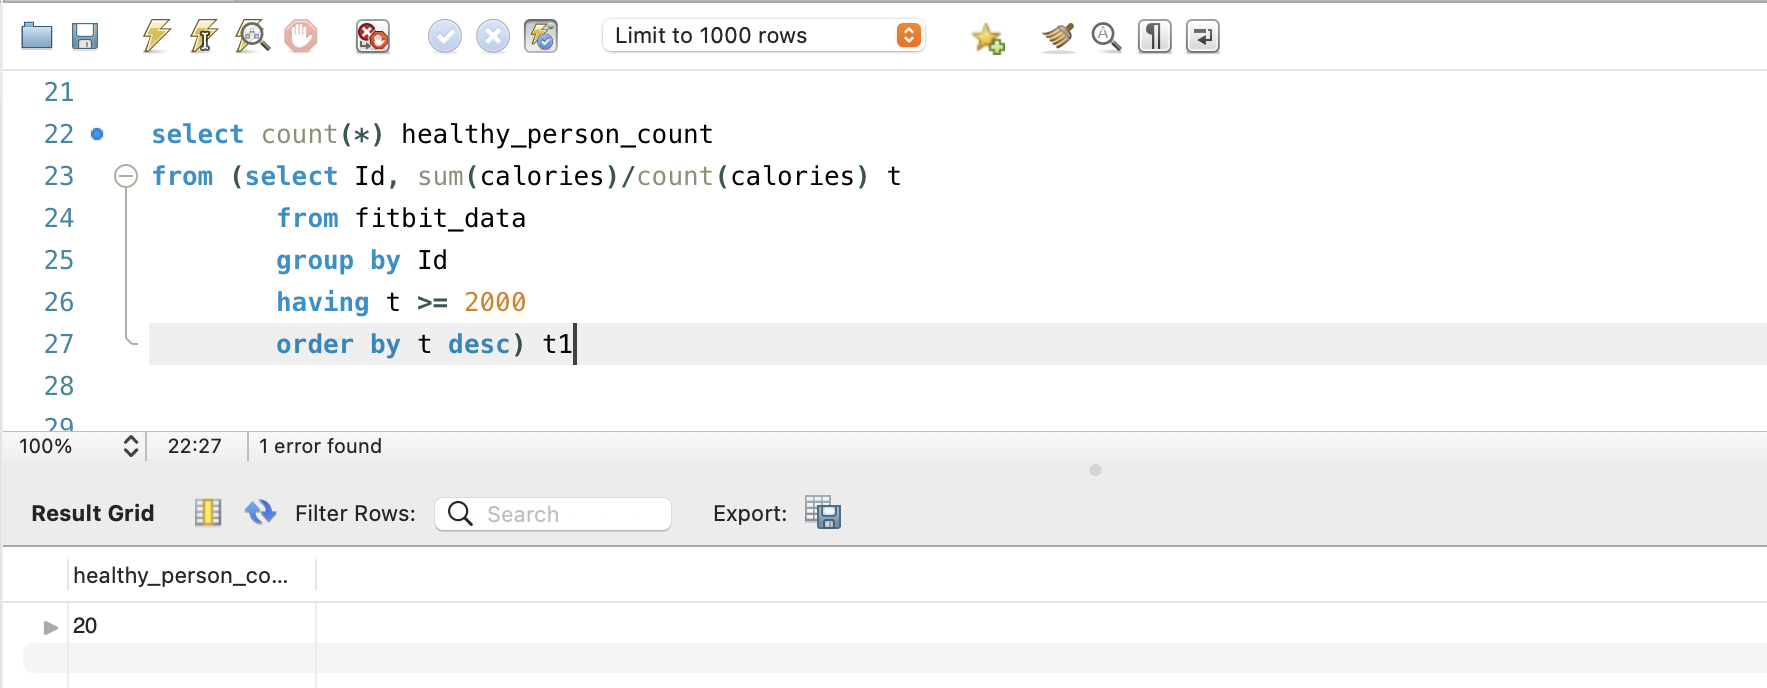

#### 9. How many person are not a regular person with respect to activity try to find out those 

- If user's light_activity_minutes = 0, then we can consider that the user was inactive for that day. Because these are the least active minutes that a user can be active for a day

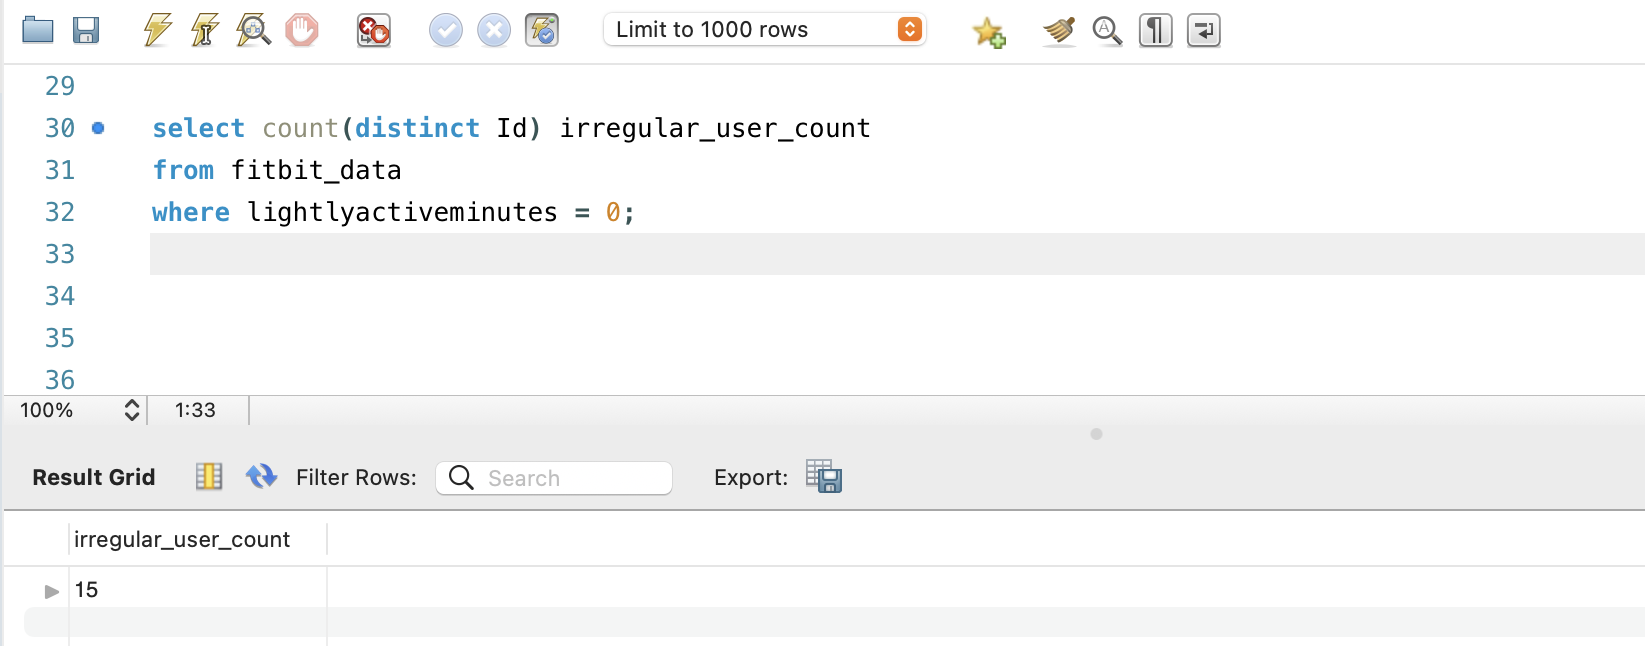

#### 10. Who is the third most active person in this dataset find out those in pandas and in sql both

In [39]:
df1['TotalUserActivity'] = df1[['VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes']].sum(axis=1)

In [43]:
d = df1[['Id','TotalUserActivity']].groupby('Id')

In [55]:
df1.groupby('Id').sum(['TotalUserActivity']).sort_values(by=['TotalUserActivity'], ascending=False).iloc[2]

TotalSteps                  176956.000000
TotalDistance                  121.070000
TrackerDistance                117.400001
LoggedActivitiesDistance        14.052416
VeryActiveDistance              36.130000
ModeratelyActiveDistance        24.990000
LightActiveDistance             59.850000
SedentaryActiveDistance          0.100000
VeryActiveMinutes              495.000000
FairlyActiveMinutes            406.000000
LightlyActiveMinutes          3620.000000
SedentaryMinutes              8488.000000
Calories                     29249.000000
TotalUserActivity             4521.000000
Name: 6962181067, dtype: float64

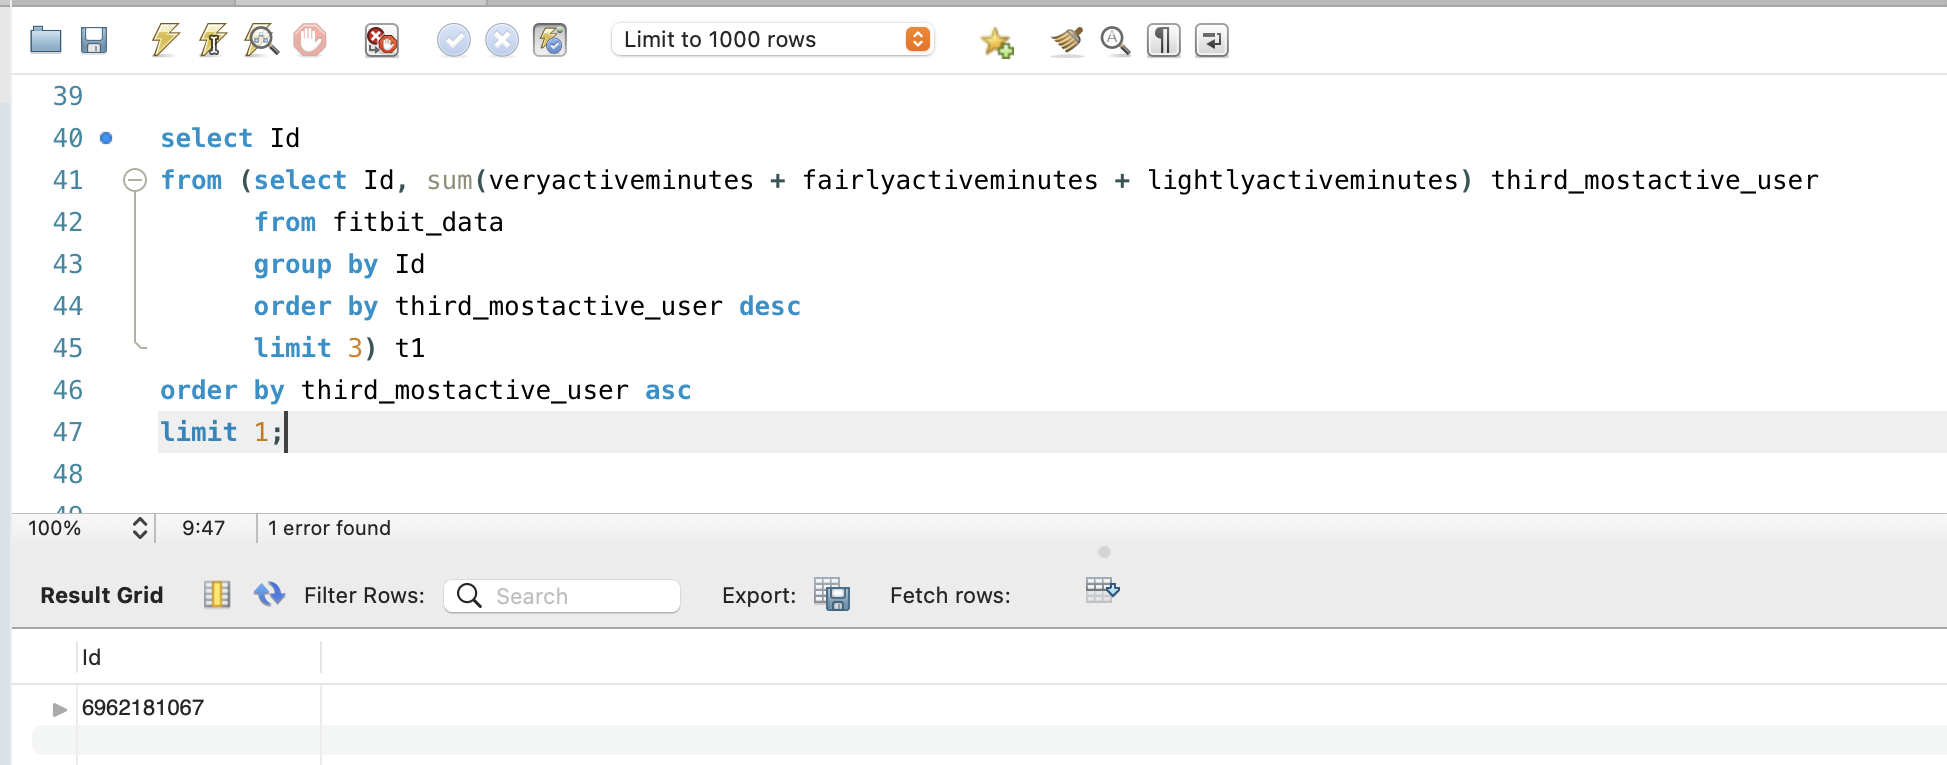

#### 11. Who is the 5th most laziest person avilable in dataset find it out 

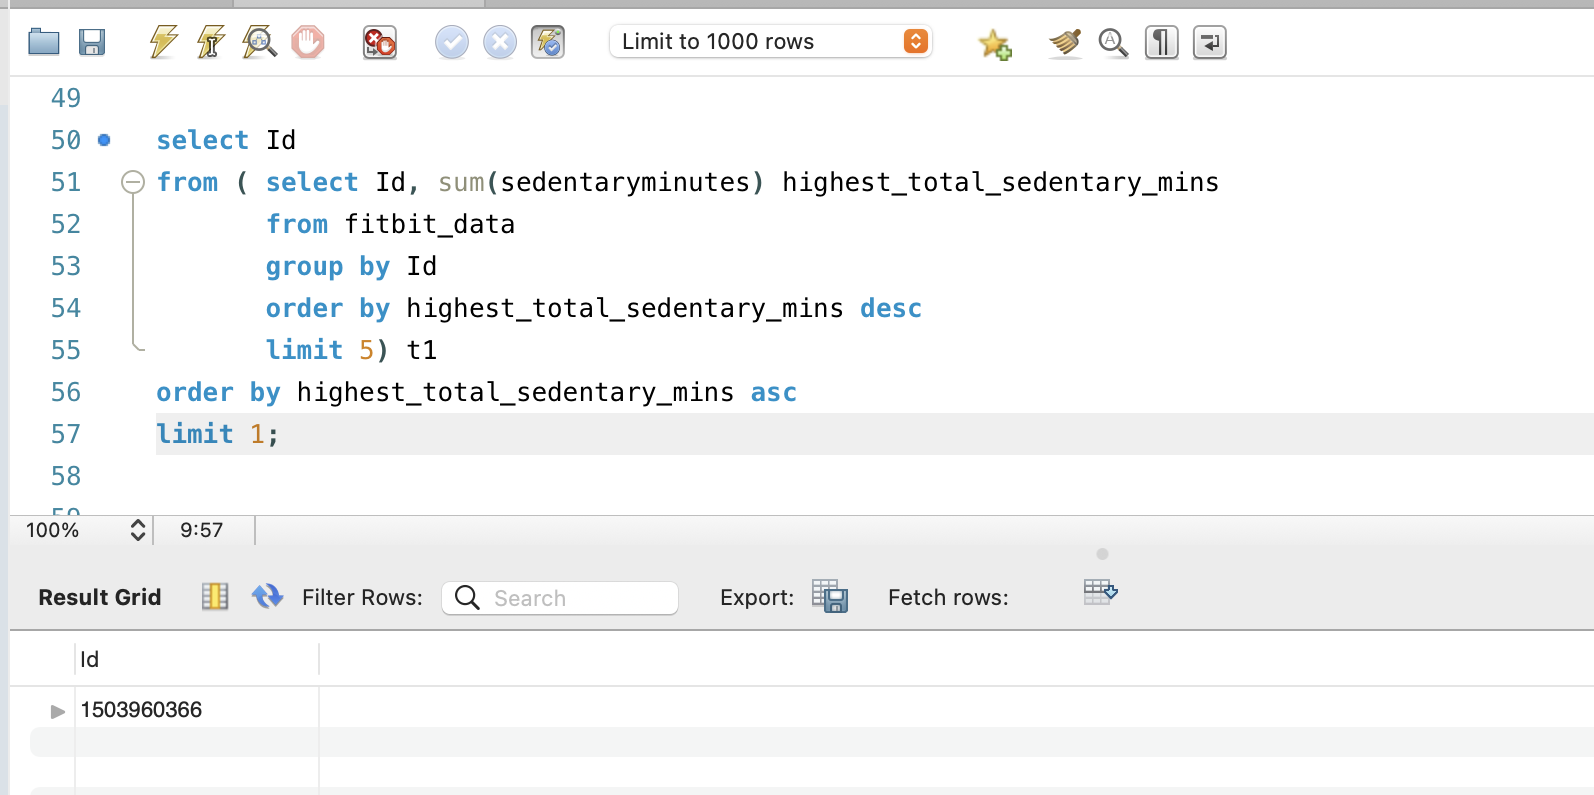

#### 12. What is the total accumulative calories burn for a person find out 

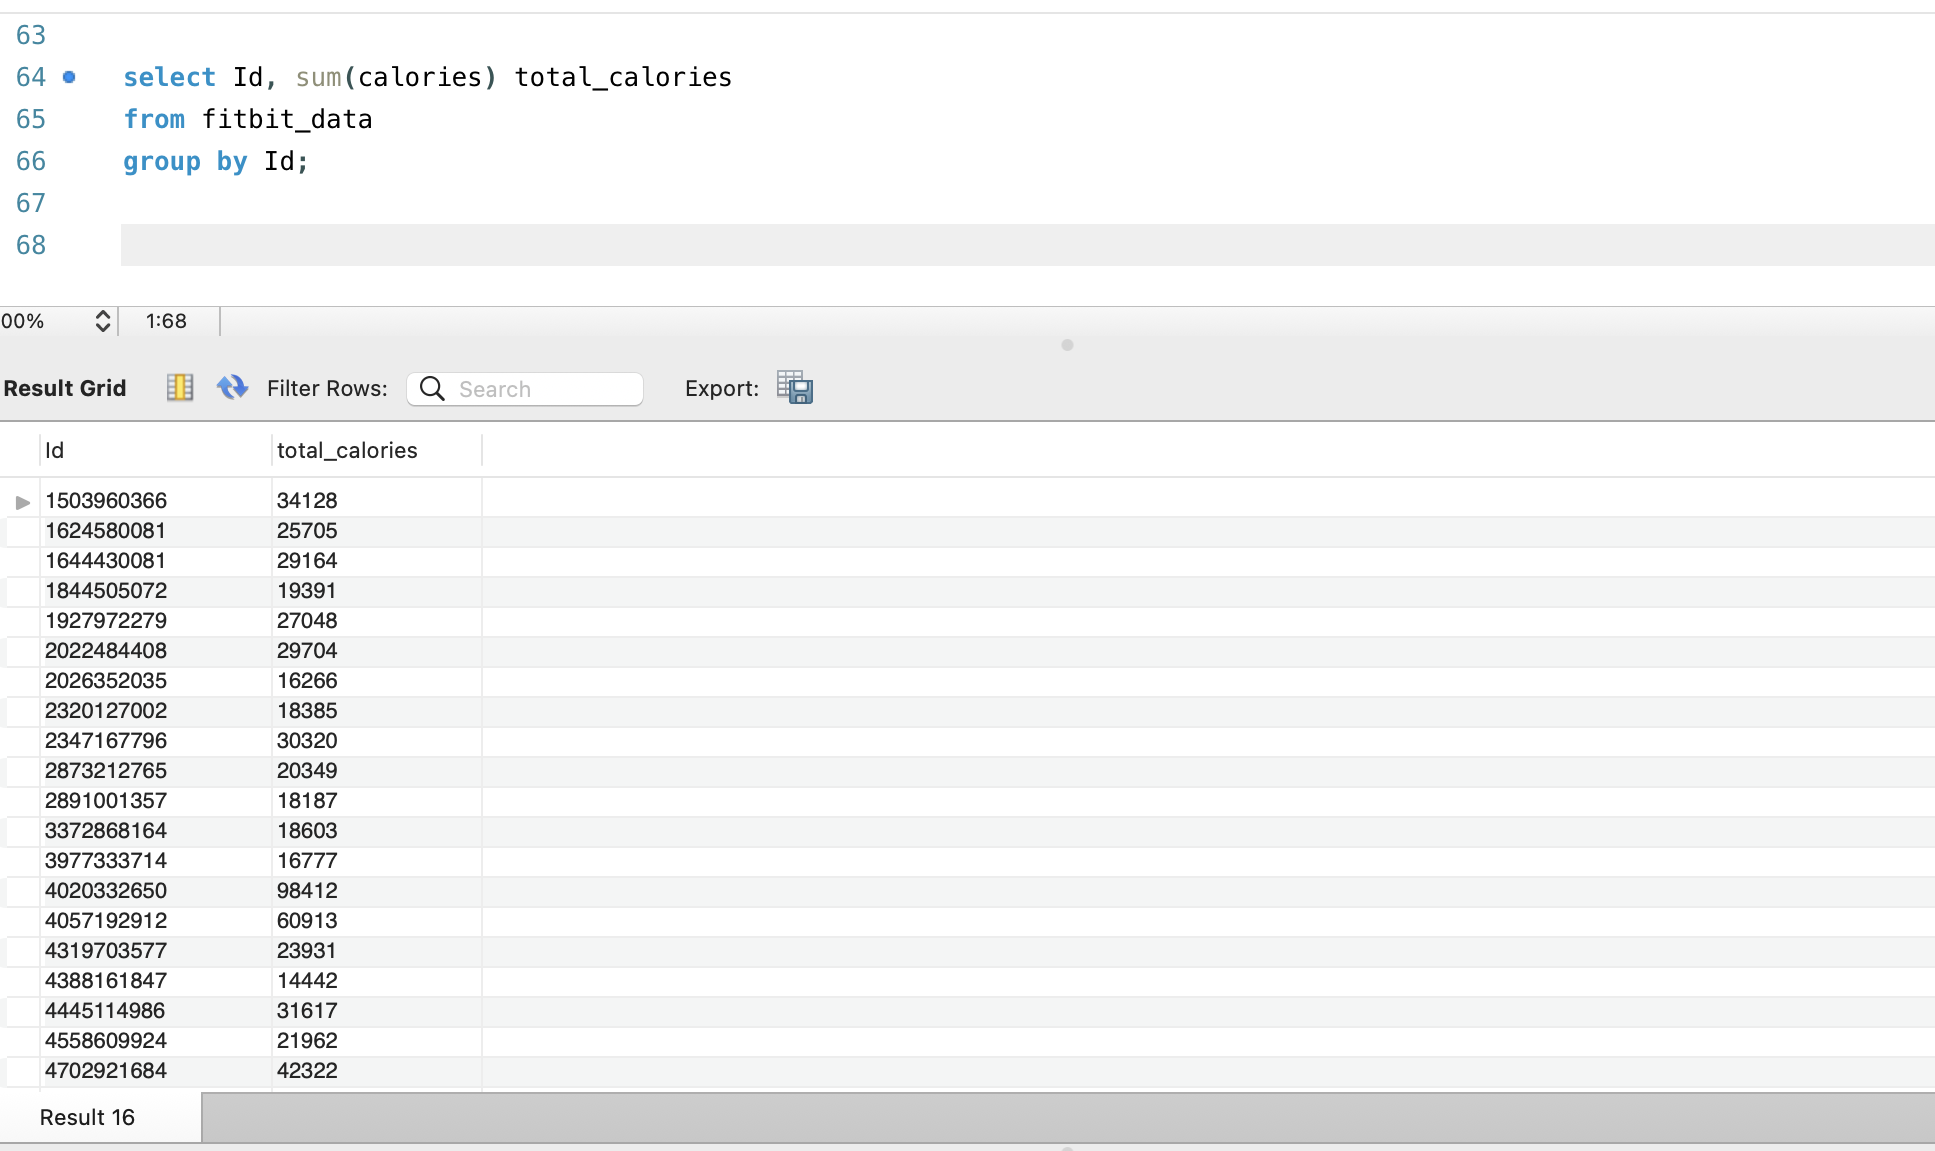